In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

In [3]:
iris = pd.read_csv('iris.csv') #load dataset

In [4]:
iris.head() #show few roles of dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.isnull().sum() #check for missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
# renaming species column to class
iris.rename(columns={'species': 'class'}, inplace=True)

# inplace=True means the changes should be reflected into the dataframe

In [7]:
iris.head(2) #to confirm if the column name has truely changed

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

## Explorative Data Analysis

In [10]:
iris.shape #this shows the number of rows and columns we have

(150, 5)

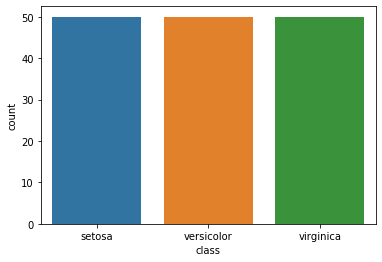

In [11]:
sns.countplot('class',data=iris)

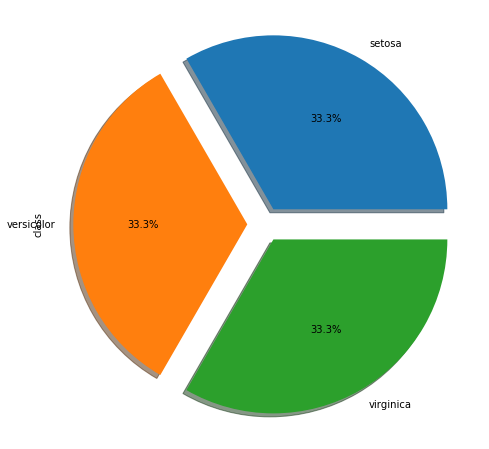

In [12]:
iris['class'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))

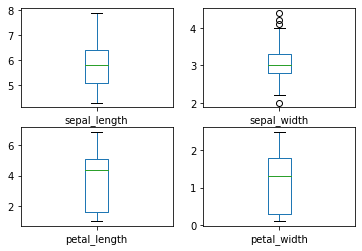

In [13]:
iris.plot(kind='box', subplots=True, layout=(2,2))
plt.show()

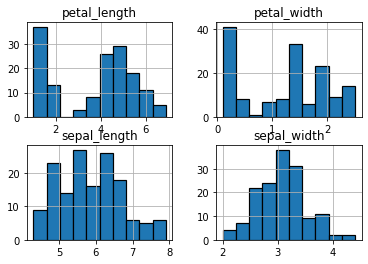

In [14]:
iris.hist(edgecolor='black', linewidth=1.2)
plt.show()

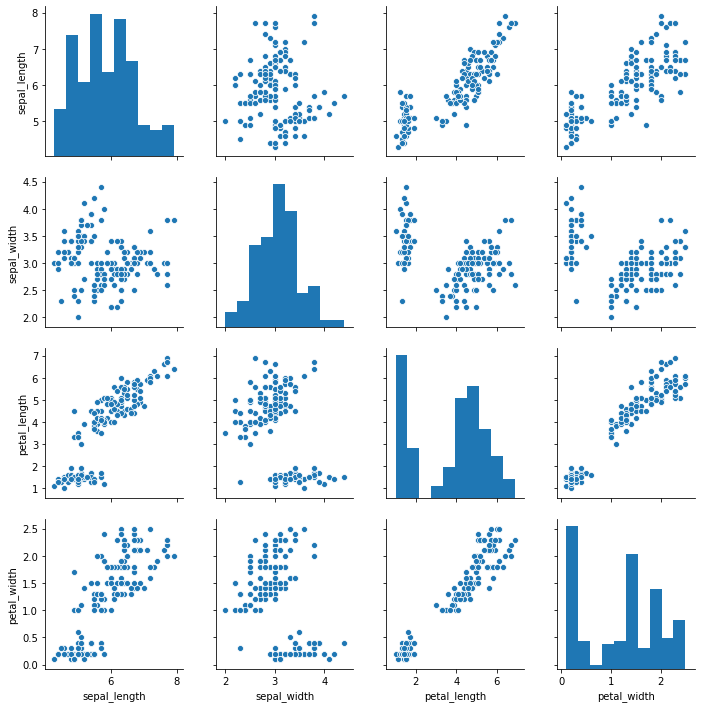

In [15]:
sns.pairplot(iris) #distribution of features

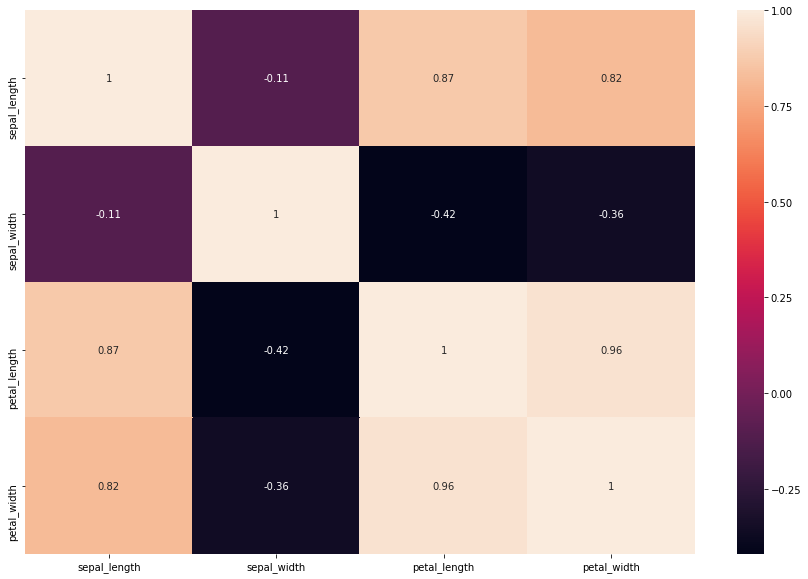

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(iris.corr(), annot=True) #correlation matrix

## Converting categorical Feature to Numerical

In [17]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
iris['class'] = encode.fit_transform(iris['class'])
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## spliting dataset into train and test

In [18]:
# creating a validation dataset
x=iris.drop(['class'], axis=1)
y=iris['class']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [20]:
x.shape

(150, 4)

In [21]:
y.shape

(150,)

## ML

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('The accuracy of logistic regression is {:.2f}' .format(lr.score(x_test, y_test)))

The accuracy of logistic regression is 1.00


In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print('The accuracy of Decision tree classifier is {:.2f}' .format(dtc.score(x_test, y_test)))

The accuracy of Decision tree classifier is 0.97


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('The accuracy of knn classifier is {:.2f}' .format(knn.score(x_test, y_test))) 

The accuracy of knn classifier is 1.00


  The KNN and Logistic regression algorithm seems to have performed the best

### Comparison report

In [25]:
predictions = knn.predict(x_test)

In [26]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()})
pred.head(10)

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,0,0
4,2,2
5,2,2
6,0,0
7,0,0
8,2,2
9,0,0


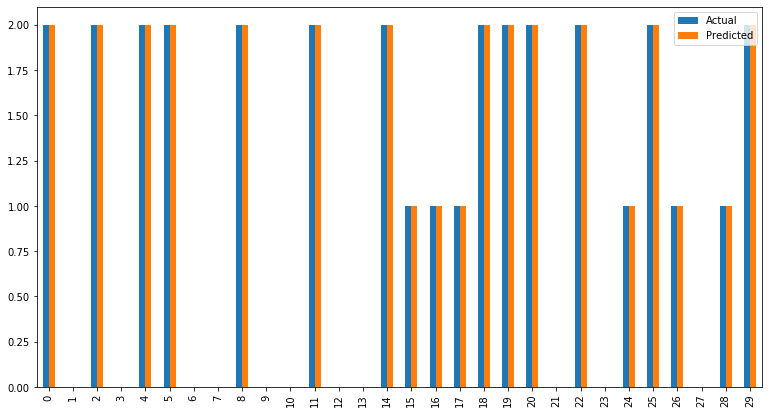

In [27]:
# visualizing the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

In [28]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 0.0
MSE 0.0
RMSE 0.0
